#Module 2
31.07.2024
#Merging database-style dataframes
Many beginner developers get **confused** when working with pandas dataframes, especially regarding when to use **append, concat, merge, or join**.
Let's assume that you are working at a university as a professor teaching a **Software Engineering course** and an **Introduction to Machine Learning course**, and there are enough students to split into two classes.
Checkout the following Screenshot.
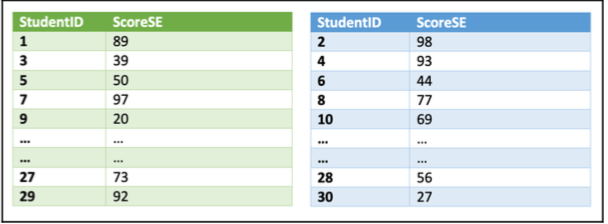

In [ ]:
#The structure of the dataframes is the same in both cases.
#In this case, we would need to concatenate them.
#We can do that by using the pandas concat() method
import pandas as pd
import numpy as np

In [ ]:
dataFrame1 =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                            'Score' : [89, 39, 50, 97, 22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
dataFrame2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                            'Score': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

# In the dataset above, the first column contains information about student identifier and the second column contains their respective scores in any subject.
#The structure of the dataframes is same in the bothe case. In this case, we would need to concatenate both of them.


In [ ]:
# We can do that by using Pandas concat() method.
#Output: A single dataframe combining both of the tables - ignore_index
#The ignore_index argument creates a new index
dataframe = pd.concat([dataFrame1, dataFrame2], ignore_index=True)
dataframe

In [ ]:
# if we want to combine them side by side
pd.concat([dataFrame1, dataFrame2], axis=1)

#Merging
Now, consider another use case where you are teaching two courses: Software Engineering and Introduction to Machine Learning. You will get two dataframes from each subject:
1. Two for the Software Engineering course
2. Another two for the Introduction to Machine Learning course.

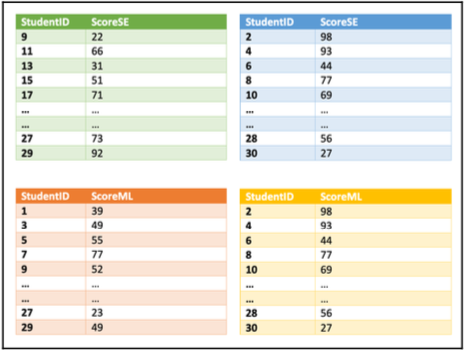

There are important details you need to note in the preceding dataframes:
* There are some students who are not taking the software engineering exam.
* There are some students who are not taking the machine learning exam.
* There are students who appeared in both courses.

Now, assume your head of department walked up to your desk and started bombarding you with a series of questions:
* How many students appeared for the exams in total?
* How many students only appeared for the Software Engineering course?
* How many students only appeared for the Machine Learning course?

The above questions can be done by using EDA.

In [ ]:
df1SE =  pd.DataFrame({ 'StudentID': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreSE' : [22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2SE =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                       'ScoreSE': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

df1ML =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreML' : [39, 49, 55, 77, 52, 86, 41, 77, 73, 51, 86, 82, 92, 23, 49]})
df2ML =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                       'ScoreML': [93, 44, 78, 97, 87, 89, 39, 43, 88, 78]})


In [ ]:
# Option 1
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = pd.concat([dfML, dfSE], axis=1)
df

In [ ]:
# Option 2
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='inner')
df

# Here, you will perform inner join with each dataframe. That is to say, if an item exists on the both dataframe, will be included in the new dataframe. This means, we will get the list of students who are appearing in both the courses.


In [ ]:
# Option 3
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='left')
df

In [ ]:
# Option 4
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='right')
df


In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/sales.csv')
df.head(10)

In [ ]:
#@title Default title text
#Add new colum that is the total price based on the quantity and the unit price

df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head(10)

In [ ]:
df['Company'].value_counts()

In [ ]:
df.describe()

#Reshaping with Hierarchical Indexing

In [ ]:
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Bergen', 'Oslo', 'Trondheim', 'Stavanger', 'Kristiansand'])
dframe1


In [ ]:
stacked = dframe1.stack()
stacked


In [ ]:
stacked.unstack()

In [ ]:
series1 = pd.Series([000, 111, 222, 333], index=['zeros','ones', 'twos', 'threes'])
series2 = pd.Series([444, 555, 666], index=['fours', 'fives', 'sixs'])

frame2 = pd.concat([series1, series2], keys=['Number1', 'Number2'])
frame2.unstack()

#Transformation techniques
02-08-2024
######1. Data deduplication
In the Merging database-style dataframes section, we saw how we can merge different types of series and dataframes.
Now, let's dive more into how we can perform other types of data transformations including **cleaning, filtering, deduplication, and others**.

In [ ]:
#Performing data deduplication
#1. Let's consider a simple dataframe, as follows:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 +
 ['Functions'] * 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3

In [ ]:
#2. The pandas dataframe comes with a duplicated() method that returns a Boolean series stating which of the rows are duplicates:
frame3.duplicated()

In [ ]:
#3. Now, we can drop these duplicates using the drop_duplicates() method:
frame4 = frame3.drop_duplicates()
frame4

In [ ]:
#4. Let's add a new column and try to find duplicated items based on the second column:
frame3['column 3'] = range(7)
frame5 = frame3.drop_duplicates(['column 2'])
frame5




#Note that both the duplicated and drop_duplicates methods keep the first observed value during the duplication removal process.

#####2. Replacing values

In [ ]:
#find and replace some values inside a dataframe
import numpy as np
import pandas as pd
replaceFrame = pd.DataFrame({'column 1': [200.00, 3000., -786.,
            3000., 234., 444., -786., 332., 3332. ], 'column 2': range(9)})
replaceFrame

In [ ]:
#Replace -786 as NaN - One replacement at a time
replaceFrame.replace(to_replace =-786, value= np.nan)

In [ ]:
#Two or more replacement. All -786 values will be replaced by NaN and all 0 values will be replaced by 2.
replaceFrame = pd.DataFrame({'column 1': [200., 3000., -786.,
            3000., 234., 444., -786., 332., 3332. ], 'column 2': range(9)})
#All -786 values will be replaced by NaN and all 0 values will be replaced by 2.

replaceFrame.replace(to_replace =[-786, 0], value= [np.nan, 2])



#####3. Handling missing data
Whenever there are missing values, a NaN value is used, which indicates that there is no value specified for that particular index. There could be several reasons why a value could be NaN:
* It can happen when data is *retrieved from an external source and there are some incomplete values in the dataset*.
* It can also happen when we *join two different datasets* and some values are not matched.
* Missing values due to *data collection errors*.
* When the shape of data changes, *there are new additional rows or columns that
are not determined*.
* *Reindexing of data* can result in incomplete data.

In [ ]:
#Let's assume we have a dataframe as shown
data = np.arange(15, 30).reshape(5, 3)
dfx = pd.DataFrame(data, index=['apple', 'banana', 'kiwi',
'grapes', 'mango'], columns=['store1', 'store2', 'store3'])
dfx

In [ ]:
#Let's add some missing values to our dataframe:
dfx['store4'] = np.nan
dfx.loc['watermelon'] = np.arange(15, 19)
dfx.loc['oranges'] = np.nan
dfx['store5'] = np.nan
dfx['store4']['apple'] = 20.
dfx

In [ ]:
#Note the following characteristics of missing values in the preceding dataframe:
#An entire row can contain NaN values.
#An entire column can contain NaN values.
#Some (but not necessarily all) values in both a row and a column can be NaN.

In [ ]:
#NaN values in pandas objects
#1. Check the following example:
dfx.isnull()

In [ ]:
#2. Check it out in action:
dfx.notnull()

In [ ]:
#3. We can use the sum() method to count the number of NaN values in each store.
dfx.isnull().sum()

In [ ]:
#4. We can go one level deeper to find the total number of missing values
dfx.isnull().sum().sum()

In [ ]:
#5. So, instead of counting the number of missing values, we can count the number of reported values:
dfx.count()

######4. Dropping missing values
One of the ways to handle missing values is to simply remove them from our dataset. We have seen that we can use the isnull() and notnull() functions from the pandas library to determine null values

In [ ]:
dfx.store4[dfx.store4.notnull()]

In [ ]:
#The output shows that store4 only reported two items of data. Now, we can use the dropna() method to remove the rows

In [ ]:
dfx.store4.dropna()


#Note that the dropna() method just returns a copy of the dataframe by dropping the rows with NaN.

In [ ]:
#If dropna() is applied to the entire dataframe, then it will drop all the rows from the dataframe, because there is at least one NaN value in our dataframe:
dfx.dropna()

In [ ]:
#####Dropping by rows
#We can also drop rows that have NaN values. To do so, we can use the how=all argument to drop only those rows entire values are entirely NaN:
dfx.dropna(how='all')

In [ ]:
#Dropping by columns
#Furthermore, we can also pass axis=1 to indicate a check for NaN by columns.
dfx.dropna(how='all', axis=1)

In [ ]:
#we can also pass another argument, thresh, to specify a minimum number of NaNs that must exist before the column should be dropped:
dfx.dropna(thresh=5, axis=1)

In [ ]:
#Mathematical operations with NaN
ar1 = np.array([100, 200, np.nan, 300])
ser1 = pd.Series(ar1)
ar1.mean(), ser1.mean()

Note the following things:
*   When a ** NumPy** function encounters NaN values, it returns **NaN**.
*   **Pandas**, on the other hand, **ignores the NaN values** and moves ahead with processing. When performing the sum operation, **NaN is treated as 0**. If all the values are NaN, the result is also NaN.

In [ ]:
#Let's compute the total quantity of fruits sold by store4:
ser2 = dfx.store4
ser2.sum()

In [ ]:
#Average
ser2.mean()

In [ ]:
#Cumulative Summing
ser2.cumsum()

#####5.Filling missing values

In [ ]:
#We can use the fillna() method to replace NaN values with any particular values.
filledDf = dfx.fillna(0)
filledDf

In [ ]:
#Check the difference in the following between NaN and NA filling
dfx.mean()
filledDf.mean()


In [ ]:
#Backward and forward filling
#forward-filling - method = ffill
dfx.store4.fillna(method='ffill')

In [ ]:
#backwad-filling -method =bfill
dfx.store4.fillna(method='bfill')